<a href="https://colab.research.google.com/github/evertonsilvauea/trabalho_estatistica/blob/main/pcorrea-esilva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gráficos

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys

import statistics as st
from scipy import stats
from collections import Counter
import math


## Base de dados

In [9]:
dataset = pd.read_csv('/content/DadosEstatisticos-com-colunas-de-interesse.csv',sep=';',encoding = 'latin-1')
dataset.head()


,EMPRESA (SIGLA),EMPRESA (NOME),EMPRESA (NACIONALIDADE),ANO,MÊS,AEROPORTO DE ORIGEM (SIGLA),AEROPORTO DE ORIGEM (NOME),AEROPORTO DE ORIGEM (UF),AEROPORTO DE ORIGEM (REGIÃO),AEROPORTO DE ORIGEM (PAÍS),AEROPORTO DE ORIGEM (CONTINENTE),AEROPORTO DE DESTINO (SIGLA),AEROPORTO DE DESTINO (NOME),AEROPORTO DE DESTINO (UF),AEROPORTO DE DESTINO (REGIÃO),AEROPORTO DE DESTINO (PAÍS),AEROPORTO DE DESTINO (CONTINENTE),NATUREZA,PASSAGEIROS PAGOS,PASSAGEIROS GRÁTIS,CARGA PAGA (KG),CARGA GRÁTIS (KG),DISTÂNCIA VOADA (KM),DECOLAGENS,ASSENTOS,HORAS VOADAS,BAGAGEM (KG)
0,AAL,"AMERICAN AIRLINES, INC.",ESTRANGEIRA,2000,1,KDFW,"DALLAS & FORT WORTH, TEXAS",NaN,NaN,ESTADOS UNIDOS DA AMÉRICA,AMÉRICA DO NORTE,SBGR,GUARULHOS,SP,SUDESTE,BRASIL,AMÉRICA DO SUL,INTERNACIONAL,3932.0,142.0,97876.0,0.0,247320.0,30.0,6330.0,"409,08",NaN
1,AAL,"AMERICAN AIRLINES, INC.",ESTRANGEIRA,2000,1,KJFK,"NEW YORK, NEW YORK",NaN,NaN,ESTADOS UNIDOS DA AMÉRICA,AMÉRICA DO NORTE,SBGL,RIO DE JANEIRO,RJ,SUDESTE,BRASIL,AMÉRICA DO SUL,INTERNACIONAL,2338.0,131.0,48066.0,0.0,224141.0,29.0,6119.0,"418,1",NaN
2,AAL,"AMERICAN AIRLINES, INC.",ESTRANGEIRA,2000,1,KJFK,"NEW YORK, NEW YORK",NaN,NaN,ESTADOS UNIDOS DA AMÉRICA,AMÉRICA DO NORTE,SBGR,GUARULHOS,SP,SUDESTE,BRASIL,AMÉRICA DO SUL,INTERNACIONAL,2892.0,127.0,194997.0,0.0,222256.0,29.0,6119.0,"411,5",NaN
3,AAL,"AMERICAN AIRLINES, INC.",ESTRANGEIRA,2000,1,KMIA,"MIAMI, FLORIDA",NaN,NaN,ESTADOS UNIDOS DA AMÉRICA,AMÉRICA DO NORTE,SBCF,CONFINS,MG,SUDESTE,BRASIL,AMÉRICA DO SUL,INTERNACIONAL,997.0,20.0,91022.0,493.0,NaN,NaN,NaN,NaN,NaN
4,AAL,"AMERICAN AIRLINES, INC.",ESTRANGEIRA,2000,1,KMIA,"MIAMI, FLORIDA",NaN,NaN,ESTADOS UNIDOS DA AMÉRICA,AMÉRICA DO NORTE,SBGL,RIO DE JANEIRO,RJ,SUDESTE,BRASIL,AMÉRICA DO SUL,INTERNACIONAL,3589.0,133.0,29865.0,6429.0,208227.0,31.0,6541.0,"491,8",NaN


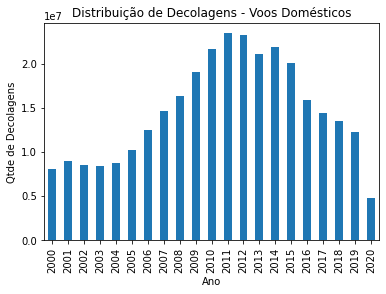

In [20]:
dataset.loc[dataset['AEROPORTO DE ORIGEM (NOME)'] == 'MANAUS'].groupby(['ANO'])['BAGAGEM (KG)'].sum().plot(kind='bar', title='Distribuição de Decolagens - Voos Domésticos', xlabel='Ano',ylabel='Qtde de Decolagens')

In [142]:
dataset_manaus_2017 = dataset[dataset['ANO']==2017] 
_dataset_manaus = dataset_manaus_2017[dataset_manaus_2017['AEROPORTO DE ORIGEM (NOME)']=='MANAUS'] 
groupby_manaus_2017 = _dataset_manaus[['AEROPORTO DE ORIGEM (NOME)','AEROPORTO DE DESTINO (NOME)','MÊS','ANO','BAGAGEM (KG)']].groupby(_dataset_manaus['BAGAGEM (KG)'])
groupby_manaus_2017.head(12)
# print(type(groupby_manaus_2017))

,AEROPORTO DE ORIGEM (NOME),AEROPORTO DE DESTINO (NOME),MÊS,ANO,BAGAGEM (KG)
747866,MANAUS,"NEW YORK, NEW YORK",1,2017,NaN
747867,MANAUS,"MIAMI, FLORIDA",1,2017,NaN
747868,MANAUS,NASSAU/INTL NEW PROVIDENCE,1,2017,NaN
747892,MANAUS,"MIAMI, FLORIDA",2,2017,NaN
747916,MANAUS,"MIAMI, FLORIDA",3,2017,NaN
...,...,...,...,...,...
786504,MANAUS,COARI,9,2017,15787.0
786524,MANAUS,TEFÉ,10,2017,406.0
786525,MANAUS,COARI,10,2017,15006.0
786551,MANAUS,COARI,11,2017,15697.0


In [176]:
def functionStatiscals_manaus(colum):
  _res = 0
  i = 0
  passageiros_gratis = []
  for x in _dataset_manaus[colum]:
    # print(np.asarray(x))
    x = np.asarray(x)
    i = i + 1
    if not math.isnan(x):
      _res = _res + int(x)
      
      passageiros_gratis.append(int(x))
  
  print(f'{colum:#^53}')
  print(f'A média é: {round(st.mean(passageiros_gratis))}')
  print(f'A mediana é: {round(st.median(passageiros_gratis))}')
  print(f'A moda é: {round(st.mode(passageiros_gratis))}')
  print(f'A desvio padrão é: {round(st.pstdev(passageiros_gratis))}')
  print(f'A variância é: {round(st.variance(passageiros_gratis))}')
  print(f'A coeficiente de variação é: {coeficient_of_variation(passageiros_gratis)}')
  print(stats.describe(_dataset_manaus[colum].dropna()))

#functionStatiscals_manaus('BAGAGEM (KG)',_dataset_manaus)

## Gráfico de dispersão

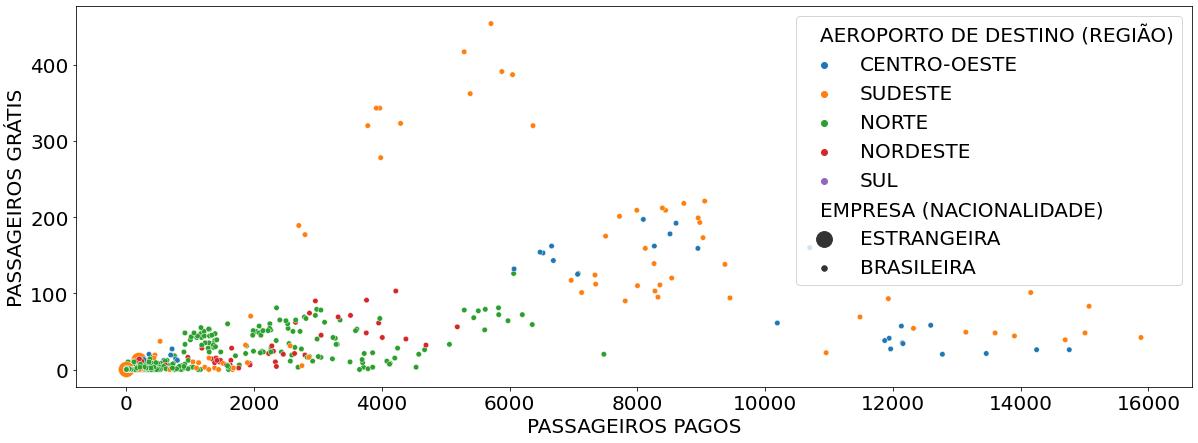

In [228]:
f, ax = plt.subplots(figsize=(20, 7))
disperssao = sns.scatterplot(x = 'PASSAGEIROS PAGOS', y = 'PASSAGEIROS GRÁTIS', data=_dataset_manaus,
            hue = 'AEROPORTO DE DESTINO (REGIÃO)', size = 'EMPRESA (NACIONALIDADE)',sizes=(30,250));


## Gráfico de barra e setor (pizza)

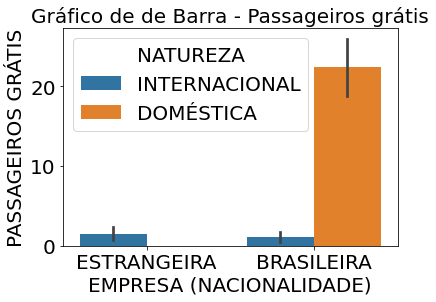

In [230]:
plt.title('Gráfico de de Barra - Passageiros grátis', fontsize=20)
sns.barplot(x = 'EMPRESA (NACIONALIDADE)', y = 'PASSAGEIROS GRÁTIS', data=_dataset_manaus, hue = 'NATUREZA');

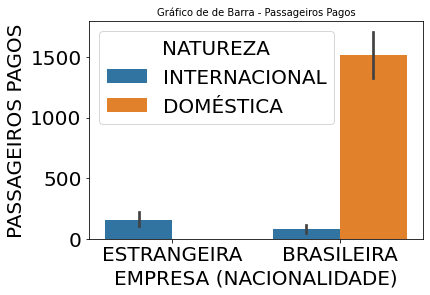

In [164]:
plt.title('Gráfico de de Barra - Passageiros Pagos', fontsize=20,figu)
sns.barplot(x = 'EMPRESA (NACIONALIDADE)', y = 'PASSAGEIROS PAGOS', data=_dataset_manaus, hue = 'NATUREZA');

In [165]:
dados_agrupados = _dataset_manaus.groupby(['EMPRESA (NACIONALIDADE)'])['BAGAGEM (KG)'].sum()
dados_agrupados

EMPRESA (NACIONALIDADE)
BRASILEIRA     14468848.0
ESTRANGEIRA           0.0
Name: BAGAGEM (KG), dtype: float64

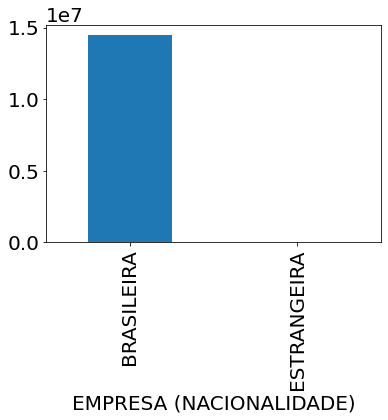

In [166]:
dados_agrupados.plot.bar();

##Quantidade de voos que partem de Manaus para cada destino

In [169]:
def coeficient_of_variation(var):
  _cv = round(100*st.stdev(var)/st.mean(var), 2)
  return _cv

In [170]:
def functionStatiscals(colum):
  _res = 0
  passageiros_gratis = []
  for x in _dataset_manaus[colum]:
    # i = i + 1
    if not math.isnan(x):
      _res = _res + x
      
      passageiros_gratis.append(x)
  print(f'{colum:#^53}')
  print(f'A média é: {round(st.mean(passageiros_gratis))}')
  print(f'A mediana é: {round(st.median(passageiros_gratis))}')
  print(f'A moda é: {round(st.mode(passageiros_gratis))}')
  print(f'A desvio padrão é: {round(st.pstdev(passageiros_gratis))}')
  print(f'A variância é: {round(st.variance(passageiros_gratis))}')
  print(f'A coeficiente de variação é: {coeficient_of_variation(passageiros_gratis)}')
  print(stats.describe(_dataset_manaus[colum].dropna()))
functionStatiscals('PASSAGEIROS GRÁTIS')


#################PASSAGEIROS GRÁTIS##################
A média é: 15
A mediana é: 0
A moda é: 0
A desvio padrão é: 45
A variância é: 2040
A coeficiente de variação é: 301.65
DescribeResult(nobs=1259, minmax=(0.0, 454.0), mean=14.974583002382843, variance=2040.3681928903625, skewness=5.268970158930214, kurtosis=34.05276424825104)


In [171]:
def plotBox(colum):
  _res_boxplot = sns.boxplot(_dataset_manaus[colum])
  _res_boxplot.figure.set_size_inches(15,7)
  _res_boxplot.set_title(colum, fontsize=20)

In [172]:
def plotDist(colum):
  _res_boxplot = sns.distplot(_dataset_manaus[colum])
  _res_boxplot.figure.set_size_inches(15,7)
  _res_boxplot.set_title(colum, fontsize=20)

In [173]:
for _i in _dataset_manaus:
  print(_i)

EMPRESA (SIGLA)
EMPRESA (NOME)
EMPRESA (NACIONALIDADE)
ANO
MÊS
AEROPORTO DE ORIGEM (SIGLA)
AEROPORTO DE ORIGEM (NOME)
AEROPORTO DE ORIGEM (UF)
AEROPORTO DE ORIGEM (REGIÃO)
AEROPORTO DE ORIGEM (PAÍS)
AEROPORTO DE ORIGEM (CONTINENTE)
AEROPORTO DE DESTINO (SIGLA)
AEROPORTO DE DESTINO (NOME)
AEROPORTO DE DESTINO (UF)
AEROPORTO DE DESTINO (REGIÃO)
AEROPORTO DE DESTINO (PAÍS)
AEROPORTO DE DESTINO (CONTINENTE)
NATUREZA
PASSAGEIROS PAGOS
PASSAGEIROS GRÁTIS
CARGA PAGA (KG)
CARGA GRÁTIS (KG)
DISTÂNCIA VOADA (KM)
DECOLAGENS
ASSENTOS
HORAS VOADAS
BAGAGEM (KG)


In [108]:
_res = 0
carga_gratis = []
for x in dataset_manaus['CARGA GRÁTIS (KG)']:
  # i = i + 1
  if not math.isnan(x) and x <= 27:
    _res = _res + x
    
    carga_gratis.append(x)


print(f'total de carga_paga é {round(_res)}')

total de carga_paga é 503


##Mediana, Média, Moda e Desvio Padrão - Manaus

###Voos Cargas Grátis

In [177]:
functionStatiscals_manaus('CARGA GRÁTIS (KG)')

##################CARGA GRÁTIS (KG)##################
A média é: 56
A mediana é: 0
A moda é: 0
A desvio padrão é: 436
A variância é: 190321
A coeficiente de variação é: 783.06
DescribeResult(nobs=1259, minmax=(0.0, 8851.0), mean=55.71167593328038, variance=190320.752256251, skewness=13.88509652449405, kurtosis=225.05706400552552)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


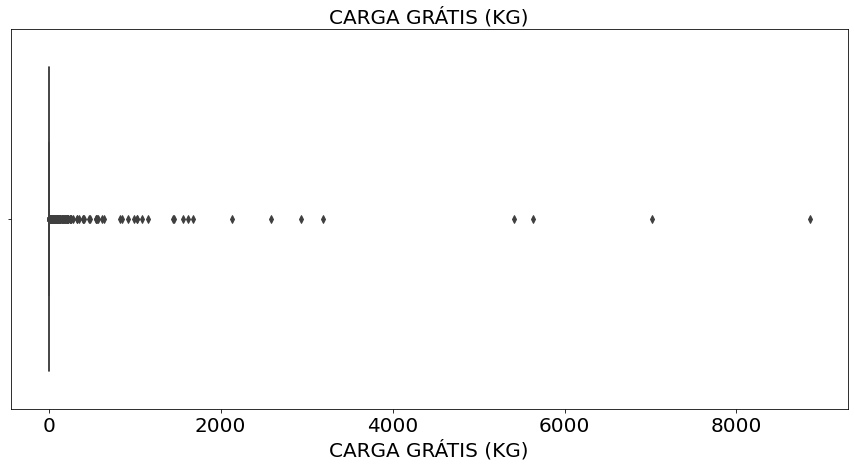

In [178]:
plotBox('CARGA GRÁTIS (KG)')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


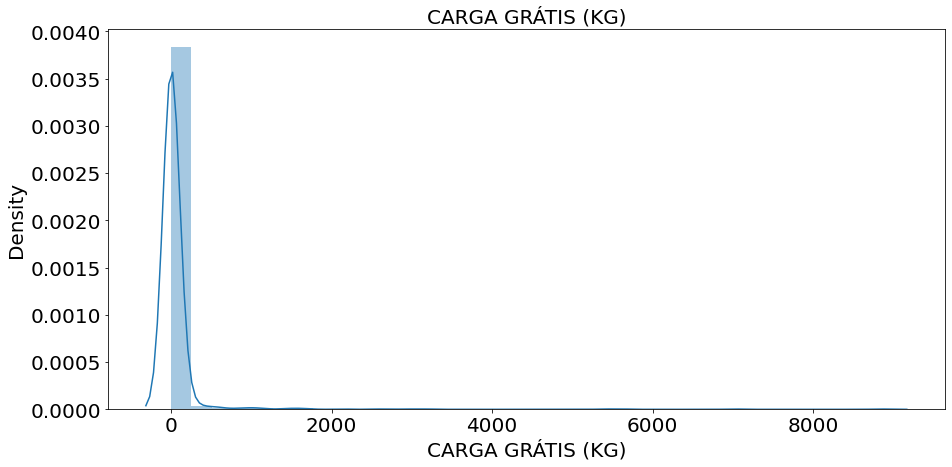

In [179]:
plotDist('CARGA GRÁTIS (KG)')

###Voos Carga Pagas

In [180]:
functionStatiscals_manaus('CARGA PAGA (KG)')

###################CARGA PAGA (KG)###################
A média é: 34024
A mediana é: 0
A moda é: 0
A desvio padrão é: 149676
A variância é: 22420595476
A coeficiente de variação é: 440.09
DescribeResult(nobs=1259, minmax=(0.0, 1541615.0), mean=34024.00079428118, variance=22420595476.069157, skewness=7.212838094204653, kurtosis=56.505326814016115)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


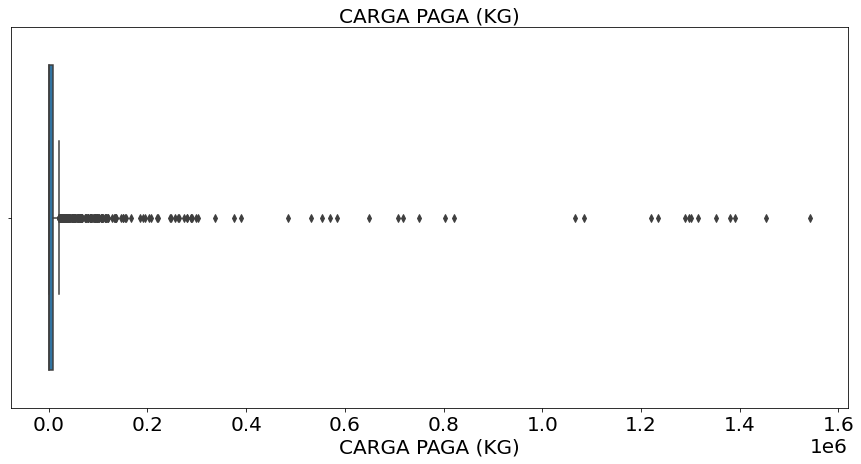

In [181]:
plotBox('CARGA PAGA (KG)')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


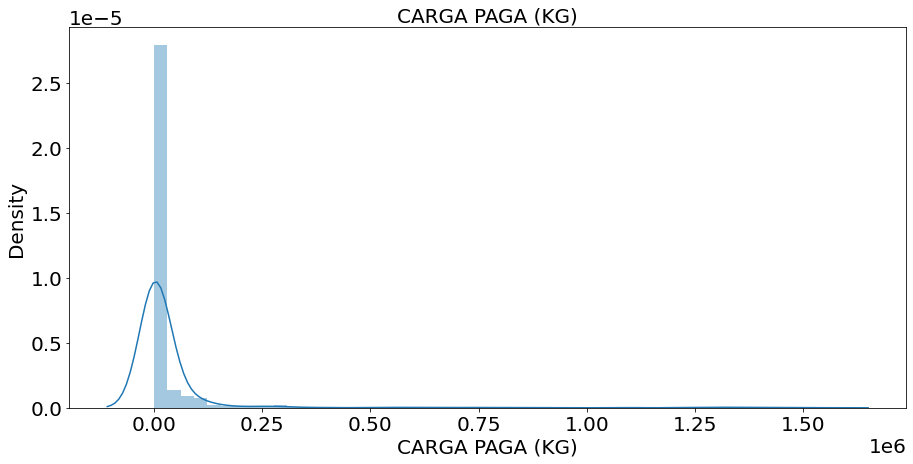

In [185]:
plotDist('CARGA PAGA (KG)')

###Voos Passageiros Grátis

In [182]:
functionStatiscals_manaus('PASSAGEIROS GRÁTIS')

#################PASSAGEIROS GRÁTIS##################
A média é: 15
A mediana é: 0
A moda é: 0
A desvio padrão é: 45
A variância é: 2040
A coeficiente de variação é: 301.65
DescribeResult(nobs=1259, minmax=(0.0, 454.0), mean=14.974583002382843, variance=2040.3681928903625, skewness=5.268970158930214, kurtosis=34.05276424825104)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


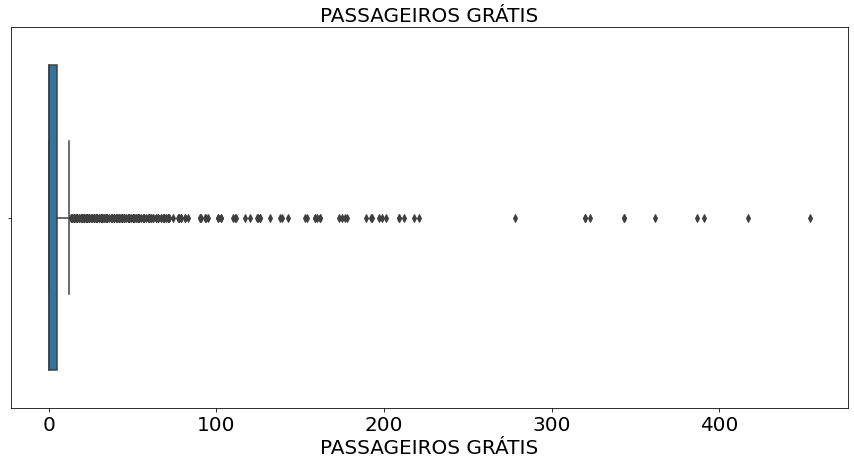

In [135]:
plotBox('PASSAGEIROS GRÁTIS')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


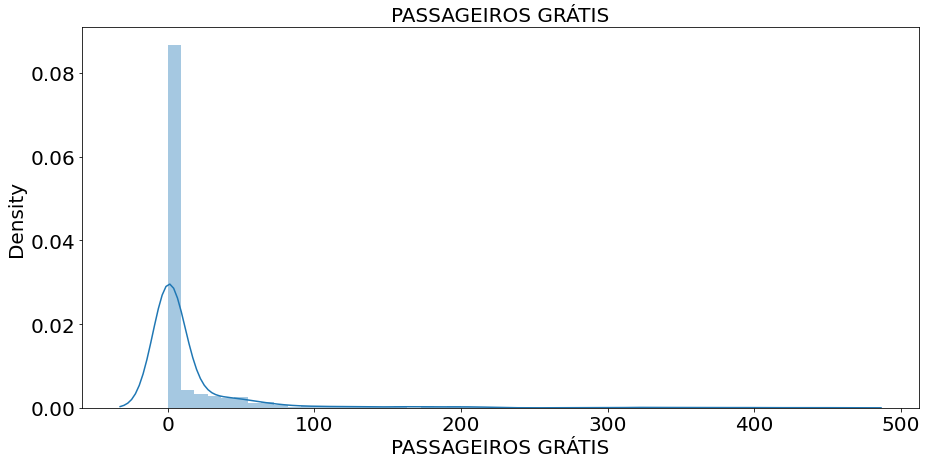

In [186]:
plotDist('PASSAGEIROS GRÁTIS')

###Voos Passageiros Pagos

In [183]:
functionStatiscals_manaus('PASSAGEIROS PAGOS')

##################PASSAGEIROS PAGOS##################
A média é: 1026
A mediana é: 40
A moda é: 0
A desvio padrão é: 2391
A variância é: 5719185
A coeficiente de variação é: 233.13
DescribeResult(nobs=1259, minmax=(0.0, 15883.0), mean=1025.8204924543288, variance=5719185.004317405, skewness=3.450157217219167, kurtosis=12.925073262689045)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


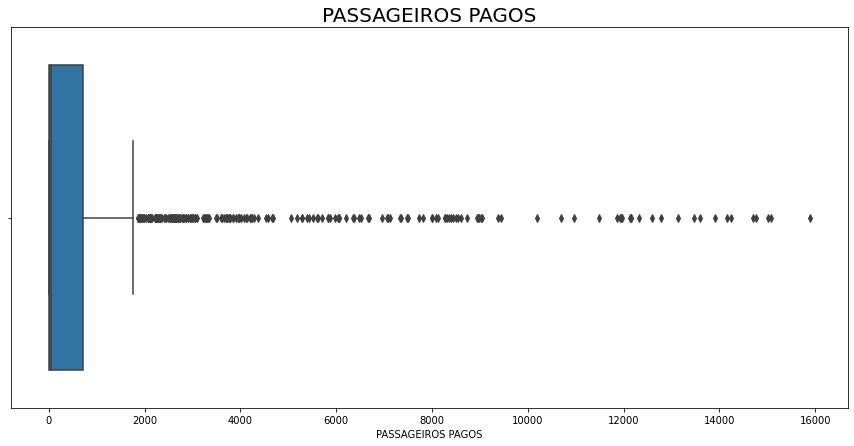

In [115]:
plotBox('PASSAGEIROS PAGOS')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


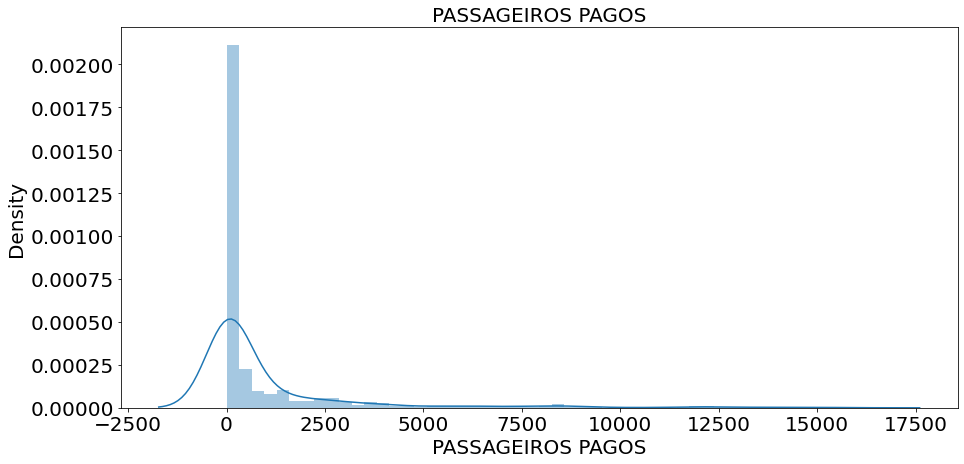

In [187]:
plotDist('PASSAGEIROS PAGOS')

###Voos Bagagens em KG

In [184]:
functionStatiscals_manaus('BAGAGEM (KG)')

####################BAGAGEM (KG)#####################
A média é: 14932
A mediana é: 1618
A moda é: 0
A desvio padrão é: 30924
A variância é: 957265658
A coeficiente de variação é: 207.21
DescribeResult(nobs=969, minmax=(0.0, 201402.0), mean=14931.731682146543, variance=957265658.1552038, skewness=3.0902381583380105, kurtosis=10.178917537622121)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


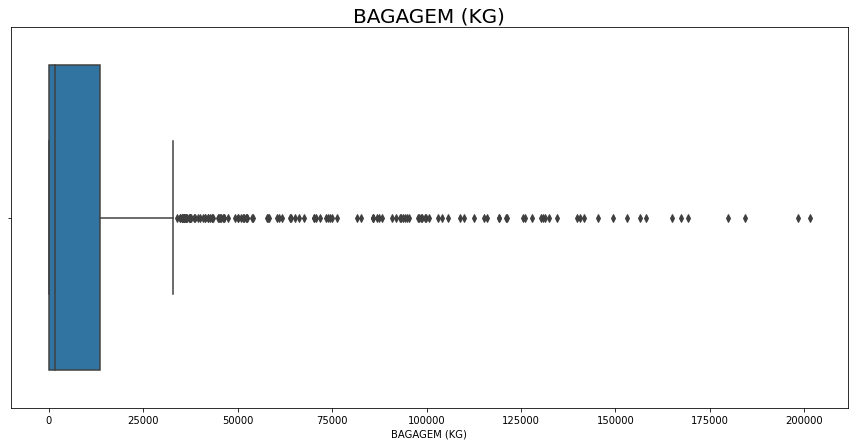

In [116]:
plotBox('BAGAGEM (KG)')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


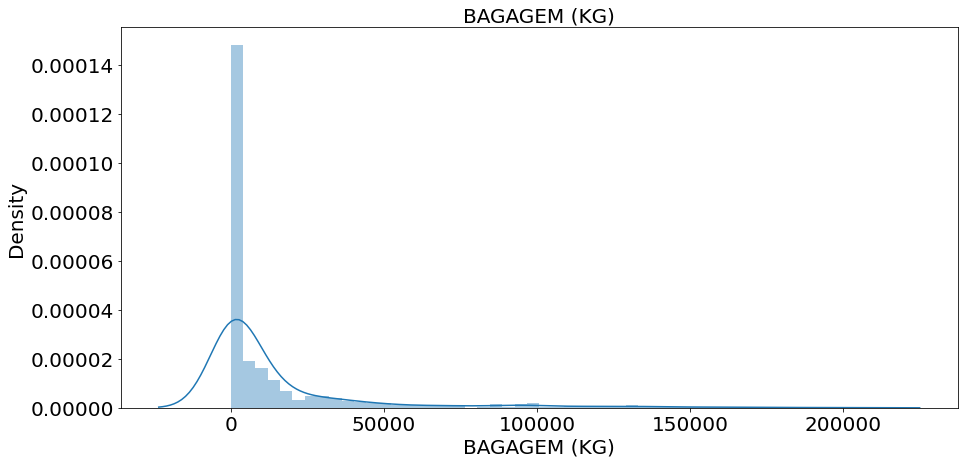

In [188]:
plotDist('BAGAGEM (KG)')

##Voos que parte de Manaus

In [189]:
# count_manaus = _dataset_manaus[_dataset_manaus['AEROPORTO DE ORIGEM (NOME)']=='MANAUS'].value_counts().to_frame()
# print(len(count_manaus))
# count_manaus.head()

In [190]:
# plt.bar(count_manaus.index,dataset[dataset['AEROPORTO DE ORIGEM (NOME)']=='MANAUS'])
# plt.show()

# count_manaus.plot.bar()

##Classificação de voos

In [193]:
def plotPizza(colum,*item):
  plt.rcParams.update({'font.size':20})
  label = [*item]
  x = _dataset_manaus.groupby(by=colum).size()
  explode = (0.1,0)
  plt.figure(figsize=(10,10))
  plt.pie(x=x, labels=label,explode=explode, autopct='%1.1f%%', startangle=90, shadow=True)
  plt.title('Classificação de voos',fontsize=20)


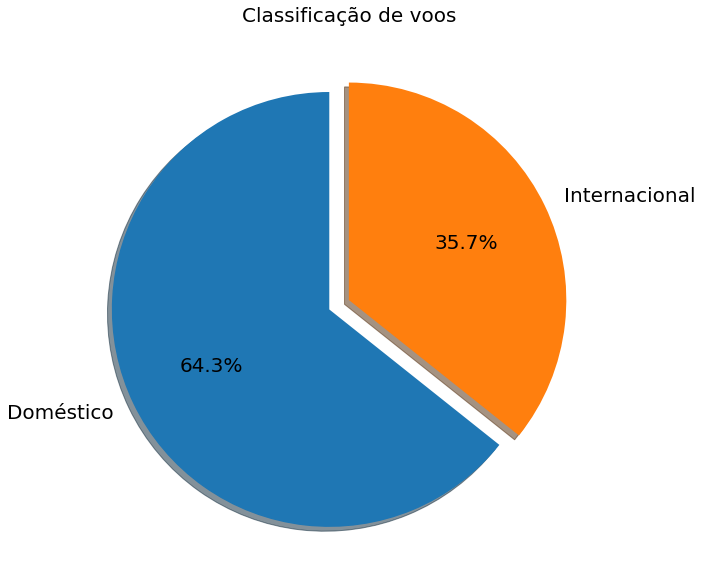

In [194]:
plotPizza('NATUREZA','Doméstico', 'Internacional')